<h1 style='color:blue'><center>Data Cleaning, Visualization and Machine learning models</center></h1>

<h4><center> Data: NYPD Motor Vehicle Collisions Summary </center></h4>
**Dataset:** https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data

**Summary:** This is a breakdown of every collision in NYC by location and injury. This data is collected because the NYC Council passed Local Law #11 in 2011. This data is manually run every month and reviewed by the TrafficStat Unit before being posted on the NYPD website. Each record represents a collision in NYC by city, borough, precinct and cross street. This data can be used by the public to see how dangerous/safe intersections are in NYC. The information is presented in pdf and excel format to allow the casual user to just view the information in the easy to read pdf format or use the excel files to do a more in-depth analysis.

This notebook will step through **downloading the data** from the website into a dataframe and **cleaning the data.**

In [1]:
import pandas as pd #Importing necessary packages - numpy and pandas
import numpy as np
from seaborn import countplot
import seaborn as sns
from matplotlib.pyplot import figure, show
%matplotlib inline
import matplotlib.pyplot as plt

### Downloading the data from the available data source as shown below.

In [2]:
download = False #Flip to true if dataset needs to be downloaded from the source location
if download:
    df = pd.read_csv("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD", low_memory = False)

else:
    df = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv", low_memory = False)


In [3]:
df.head() #Looking at the top 5 rows of the dataframe

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/08/2018,0:00,BROOKLYN,11211,40.713074,-73.952095,"(40.713074, -73.952095)",NaN,NaN,471 KEAP STREET,...,Unspecified,NaN,NaN,NaN,3996168,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,10/08/2018,0:00,BROOKLYN,11224,40.577908,-74.008180,"(40.577908, -74.00818)",NaN,NaN,4212 HIGHLAND AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3996787,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,10/08/2018,0:00,MANHATTAN,10036,40.758680,-73.983360,"(40.75868, -73.98336)",NaN,NaN,157 WEST 47 STREET,...,Unspecified,NaN,NaN,NaN,3997603,Sedan,Taxi,NaN,NaN,NaN
3,10/08/2018,0:00,NaN,NaN,40.708324,-73.843140,"(40.708324, -73.84314)",JACKIE ROBINSON PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3996194,Sedan,Sedan,NaN,NaN,NaN
4,10/08/2018,0:00,NaN,NaN,40.763428,-73.965220,"(40.763428, -73.96522)",NaN,NaN,3 AVENUE,...,Unspecified,NaN,NaN,NaN,3995663,Taxi,Pick-up Truck,NaN,NaN,NaN


In [4]:
df.shape #Checking dimensions of the data

(1360317, 29)

The dataframe has 1.36 million rows and 29 columns. Let's check for null values. 

In [5]:
df.isnull().any() #Checking what all columns have null values

DATE                             False
TIME                             False
BOROUGH                           True
ZIP CODE                          True
LATITUDE                          True
LONGITUDE                         True
LOCATION                          True
ON STREET NAME                    True
CROSS STREET NAME                 True
OFF STREET NAME                   True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1     True
CONTRIBUTING FACTOR VEHICLE 2     True
CONTRIBUTING FACTOR VEHICLE 3     True
CONTRIBUTING FACTOR VEHICLE 4     True
CONTRIBUTING FACTOR VEHICLE 5     True
UNIQUE KEY                       False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2      

* We can see that none of the unique key values is null - This implies that we have a unique identification code for each incident report.
* We have all the date and time values.
* 18 columns seem to have missing data out of the 29 columns - Especially, in this data set, as all the factors are being noted, vehicle types are being noted, number of pedestrians etc. -> These are all **incidents and not all of these may be present in every accident reported. So, it is important to take note of this before we impute any missing values.** We cannot delete missing values or set threshold for these as we will simply be losing valuable information.
* When the location data is missing, the row has been dropped as critical information is missing about the incident. 


For the purposes of coding, we will be renaming the column names as shown below.

In [6]:
#Renaming columns
df.rename(columns={'DATE': 'date', 'TIME': 'time', 'BOROUGH': 'borough', 'ZIP CODE':'zip_code', 'LATITUDE':'latitude',
                  'LONGITUDE':'longitude','LOCATION':'location','ON STREET NAME':'on_street',
                  'CROSS STREET NAME': 'cross_street', 'OFF STREET NAME':'off_street',
                  'NUMBER OF PERSONS INJURED':'num_persons_injured', 'NUMBER OF PERSONS KILLED':'num_persons_killed',
                  'NUMBER OF PEDESTRIANS INJURED':'num_pedestrians_injured',
                   'NUMBER OF PEDESTRIANS KILLED':'num_pedestrians_killed', 
                   'NUMBER OF CYCLIST INJURED':'num_cyclist_injured',
                   'NUMBER OF CYCLIST KILLED' : 'num_cyclist_killed',
                   'NUMBER OF MOTORIST INJURED':'num_motorist_injured',
                   'NUMBER OF MOTORIST KILLED': 'num_motorist_killed',
                   'CONTRIBUTING FACTOR VEHICLE 1':'contributing_factor_vehicle_1',
                   'CONTRIBUTING FACTOR VEHICLE 2':'contributing_factor_vehicle_2',
                   'CONTRIBUTING FACTOR VEHICLE 3':'contributing_factor_vehicle_3',
                   'CONTRIBUTING FACTOR VEHICLE 4':'contributing_factor_vehicle_4',
                   'CONTRIBUTING FACTOR VEHICLE 5':'contributing_factor_vehicle_5',
                   'UNIQUE KEY':'unique_key',
                   'VEHICLE TYPE CODE 1':'vehicle_type_code_1',
                   'VEHICLE TYPE CODE 2':'vehicle_type_code_2',
                   'VEHICLE TYPE CODE 3':'vehicle_type_code_3',
                   'VEHICLE TYPE CODE 4':'vehicle_type_code_4',
                   'VEHICLE TYPE CODE 5':'vehicle_type_code_5'
                  }, inplace=True)
df.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street,cross_street,off_street,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,10/08/2018,0:00,BROOKLYN,11211,40.713074,-73.952095,"(40.713074, -73.952095)",NaN,NaN,471 KEAP STREET,...,Unspecified,NaN,NaN,NaN,3996168,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,10/08/2018,0:00,BROOKLYN,11224,40.577908,-74.008180,"(40.577908, -74.00818)",NaN,NaN,4212 HIGHLAND AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3996787,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,10/08/2018,0:00,MANHATTAN,10036,40.758680,-73.983360,"(40.75868, -73.98336)",NaN,NaN,157 WEST 47 STREET,...,Unspecified,NaN,NaN,NaN,3997603,Sedan,Taxi,NaN,NaN,NaN
3,10/08/2018,0:00,NaN,NaN,40.708324,-73.843140,"(40.708324, -73.84314)",JACKIE ROBINSON PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3996194,Sedan,Sedan,NaN,NaN,NaN
4,10/08/2018,0:00,NaN,NaN,40.763428,-73.965220,"(40.763428, -73.96522)",NaN,NaN,3 AVENUE,...,Unspecified,NaN,NaN,NaN,3995663,Taxi,Pick-up Truck,NaN,NaN,NaN


Let's clean up the NA location values as we are missing critical information when this is not available.

In [7]:
df.dropna(subset=['location'],inplace=True) #dropping rows where location is missing
df.reset_index(drop=True, inplace=True) #re-indexing after dropping
df.isnull().any() #Checking what columns are still null

date                             False
time                             False
borough                           True
zip_code                          True
latitude                         False
longitude                        False
location                         False
on_street                         True
cross_street                      True
off_street                        True
num_persons_injured              False
num_persons_killed               False
num_pedestrians_injured          False
num_pedestrians_killed           False
num_cyclist_injured              False
num_cyclist_killed               False
num_motorist_injured             False
num_motorist_killed              False
contributing_factor_vehicle_1     True
contributing_factor_vehicle_2     True
contributing_factor_vehicle_3     True
contributing_factor_vehicle_4     True
contributing_factor_vehicle_5     True
unique_key                       False
vehicle_type_code_1               True
vehicle_type_code_2      

Latitude, Longitude and Location values are not null any more. 

Let's fill Borough and zipcode values 

In [8]:
from uszipcode import SearchEngine #Using uszipcode and importing SearchEngine class
search = SearchEngine() #Instantiating SearchEngine object
result = search.by_coordinates(df.latitude[6],df.longitude[6]) #getting information for corresponding latitude and longitude
result[0] #dumping object information

SimpleZipcode(zipcode='11429', zipcode_type='Standard', major_city='Queens Village', post_office_city='Queens Village, NY', common_city_list=['Queens Village', 'Jamaica', 'Queens Vlg'], county='Queens County', state='NY', lat=40.71, lng=-73.74, timezone='Eastern', radius_in_miles=1.0, area_code_list=['347', '718', '917', '929'], population=25105, population_density=19296.0, land_area_in_sqmi=1.3, water_area_in_sqmi=0.0, housing_units=7791, occupied_housing_units=7290, median_home_value=384700, median_household_income=68890, bounds_west=-73.75408, bounds_east=-73.725938, bounds_north=40.720483, bounds_south=40.701565)

In [9]:
print(result[0].zipcode) #Access zipcode
print(result[0].major_city) #Access city

11429
Queens Village


We will be defining a function that returns the zipcode and city for the given latitude and longitude as shown below.

In [10]:
def ZipCityFinder(lat,lon): 
    search = SearchEngine()
    result = search.by_coordinates(lat,lon)
    return(result[0].zipcode,result[0].major_city)
    


* **The following step was time-consuming and hence, stepping through only first 100 rows to replace null zipcode and borough information. **
* **The class SearchEngine() returns the major_city/county information and the borough information could, therefore not be extracted accurately.**

In [11]:
for size in range(len(df[:100])):  #stepping through 100 rows
    
    if pd.isnull(df.zip_code[size]) or pd.isnull(df.borough[size]): #getting corresponding zip and city for null values
        l1,l2=df.latitude[size],df.longitude[size] #getting latitude and longitude
        z,c=ZipCityFinder(l1,l2) #passing latitude and longitude into prior function
        df.zip_code[size]=z #Assign zipcode that was fetched from function
        df.borough[size]=c #Assign city that was fetched from function

df.head(10) #Looking at the top 10 values of dataframe


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,date,time,borough,zip_code,latitude,longitude,location,on_street,cross_street,off_street,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,10/08/2018,0:00,BROOKLYN,11211,40.713074,-73.952095,"(40.713074, -73.952095)",NaN,NaN,471 KEAP STREET,...,Unspecified,NaN,NaN,NaN,3996168,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,10/08/2018,0:00,BROOKLYN,11224,40.577908,-74.008180,"(40.577908, -74.00818)",NaN,NaN,4212 HIGHLAND AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3996787,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,10/08/2018,0:00,MANHATTAN,10036,40.758680,-73.983360,"(40.75868, -73.98336)",NaN,NaN,157 WEST 47 STREET,...,Unspecified,NaN,NaN,NaN,3997603,Sedan,Taxi,NaN,NaN,NaN
3,10/08/2018,0:00,Flushing,11351,40.708324,-73.843140,"(40.708324, -73.84314)",JACKIE ROBINSON PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3996194,Sedan,Sedan,NaN,NaN,NaN
4,10/08/2018,0:00,New York,10065,40.763428,-73.965220,"(40.763428, -73.96522)",NaN,NaN,3 AVENUE,...,Unspecified,NaN,NaN,NaN,3995663,Taxi,Pick-up Truck,NaN,NaN,NaN
5,10/08/2018,0:00,QUEENS,11435,40.700768,-73.810190,"(40.700768, -73.81019)",91 AVENUE,144 PLACE,NaN,...,Unsafe Speed,NaN,NaN,NaN,3996499,Sedan,Sedan,NaN,NaN,NaN
6,10/08/2018,0:01,Queens Village,11429,40.704712,-73.727425,"(40.704712, -73.727425)",CROSS ISLAND PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3996010,Sedan,NaN,NaN,NaN,NaN
7,10/08/2018,0:10,MANHATTAN,10013,40.724564,-74.007790,"(40.724564, -74.00779)",HUDSON STREET,BROOME STREET,NaN,...,Unspecified,NaN,NaN,NaN,3995363,Taxi,Bike,NaN,NaN,NaN
8,10/08/2018,0:15,BRONX,10469,40.871810,-73.855560,"(40.87181, -73.85556)",BOSTON ROAD,LACONIA AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3996597,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
9,10/08/2018,0:17,Brooklyn,11237,40.706944,-73.917740,"(40.706944, -73.91774)",HART STREET,NaN,NaN,...,Unspecified,Unspecified,Unspecified,NaN,3995713,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN


Let us now create a new tidy dataframes, where we will create a single column for - 
* vehicle_type
* contributing_factor_type
* street_info

Creating a list of relevant columns to retain after melting the **vehicle_type**

In [12]:
other_cols = ['date','time','borough','zip_code','latitude','longitude','location','num_persons_injured',
               'num_persons_killed', 'num_pedestrians_injured', 'num_pedestrians_killed', 'num_cyclist_injured', 
               'num_cyclist_killed', 'num_motorist_injured', 'num_motorist_killed', 'unique_key', 'on_street',
               'off_street','cross_street','contributing_factor_vehicle_1','contributing_factor_vehicle_2',
               'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4','contributing_factor_vehicle_5']

Let's say our analysis needs us to look into the street info closely - the street at which the accident was reported. We can use melt and instead of using on_street, off_street and cross_street - we can combine street information into a column called street_info and have the corresponding street name as shown below. 

In [13]:
tidy_vehicle_info_1 = df.melt(id_vars=other_cols,
                             value_vars = ['vehicle_type_code_1','vehicle_type_code_2','vehicle_type_code_3',
                                           'vehicle_code_type_4','vehicle_code_type_5'],
                             var_name = 'vehicle_type',
                             value_name = 'vehicle_type_name') #Melting vehicle_type columns and storing new dataframe
                                                               #into tidy_vehicle_info_1
tidy_vehicle_info_1.head()

,date,time,borough,zip_code,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,...,on_street,off_street,cross_street,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type,vehicle_type_name
0,10/08/2018,0:00,BROOKLYN,11211,40.713074,-73.952095,"(40.713074, -73.952095)",0,0,0,...,NaN,471 KEAP STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
1,10/08/2018,0:00,BROOKLYN,11224,40.577908,-74.008180,"(40.577908, -74.00818)",0,0,0,...,NaN,4212 HIGHLAND AVENUE,NaN,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,vehicle_type_code_1,Station Wagon/Sport Utility Vehicle
2,10/08/2018,0:00,MANHATTAN,10036,40.758680,-73.983360,"(40.75868, -73.98336)",0,0,0,...,NaN,157 WEST 47 STREET,NaN,Other Vehicular,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
3,10/08/2018,0:00,Flushing,11351,40.708324,-73.843140,"(40.708324, -73.84314)",0,0,0,...,JACKIE ROBINSON PKWY,NaN,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
4,10/08/2018,0:00,New York,10065,40.763428,-73.965220,"(40.763428, -73.96522)",0,0,0,...,NaN,3 AVENUE,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Taxi


Note how we were able to reduce 5 vehicle type columns to 2 namely - **vehicle_type, vehicle_type_name**

In [14]:
tidy_vehicle_info_1.dropna(subset = ['vehicle_type_name'], inplace=True) #Dropping na values in vehicle_type_name
tidy_vehicle_info_1.reset_index(drop=True, inplace=True) #Resetting index after drop
tidy_vehicle_info_1.head() #Seeing the top 5 rows of the new dataframe

,date,time,borough,zip_code,latitude,longitude,location,num_persons_injured,num_persons_killed,num_pedestrians_injured,...,on_street,off_street,cross_street,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type,vehicle_type_name
0,10/08/2018,0:00,BROOKLYN,11211,40.713074,-73.952095,"(40.713074, -73.952095)",0,0,0,...,NaN,471 KEAP STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
1,10/08/2018,0:00,BROOKLYN,11224,40.577908,-74.008180,"(40.577908, -74.00818)",0,0,0,...,NaN,4212 HIGHLAND AVENUE,NaN,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,vehicle_type_code_1,Station Wagon/Sport Utility Vehicle
2,10/08/2018,0:00,MANHATTAN,10036,40.758680,-73.983360,"(40.75868, -73.98336)",0,0,0,...,NaN,157 WEST 47 STREET,NaN,Other Vehicular,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
3,10/08/2018,0:00,Flushing,11351,40.708324,-73.843140,"(40.708324, -73.84314)",0,0,0,...,JACKIE ROBINSON PKWY,NaN,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Sedan
4,10/08/2018,0:00,New York,10065,40.763428,-73.965220,"(40.763428, -73.96522)",0,0,0,...,NaN,3 AVENUE,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,vehicle_type_code_1,Taxi


Now, we will be melting the contributing_factor_vehicle columns into **contributing_factor_type and contributing_factor_name**

In [15]:
contributing_factors = ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
                        'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 
                        'contributing_factor_vehicle_5'] #Creating a list of contributing_factor column names
#Removing contributing factor columns, since we will be removing them and adding the new columns created in the previous step
other_cols = list(set(other_cols)-set(contributing_factors)) + ['vehicle_type', 'vehicle_type_name'] 
    
tidy_contributing_factor = tidy_vehicle_info_1.melt(id_vars=other_cols,
                             value_vars = contributing_factors,
                             var_name = 'contributing_factor_type',
                             value_name = 'contributing_factor_name') #Melting contributing_factor columns
tidy_contributing_factor.head() #Viewing top

,num_persons_killed,on_street,location,num_motorist_killed,unique_key,num_motorist_injured,num_pedestrians_killed,borough,time,off_street,...,cross_street,num_persons_injured,num_cyclist_injured,latitude,longitude,date,vehicle_type,vehicle_type_name,contributing_factor_type,contributing_factor_name
0,0,NaN,"(40.713074, -73.952095)",0,3996168,0,0,BROOKLYN,0:00,471 KEAP STREET,...,NaN,0,0,40.713074,-73.952095,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Driver Inattention/Distraction
1,0,NaN,"(40.577908, -74.00818)",0,3996787,0,0,BROOKLYN,0:00,4212 HIGHLAND AVENUE,...,NaN,0,0,40.577908,-74.008180,10/08/2018,vehicle_type_code_1,Station Wagon/Sport Utility Vehicle,contributing_factor_vehicle_1,Driver Inattention/Distraction
2,0,NaN,"(40.75868, -73.98336)",0,3997603,0,0,MANHATTAN,0:00,157 WEST 47 STREET,...,NaN,0,0,40.758680,-73.983360,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Other Vehicular
3,0,JACKIE ROBINSON PKWY,"(40.708324, -73.84314)",0,3996194,0,0,Flushing,0:00,NaN,...,NaN,0,0,40.708324,-73.843140,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Driver Inattention/Distraction
4,0,NaN,"(40.763428, -73.96522)",0,3995663,0,0,New York,0:00,3 AVENUE,...,NaN,0,0,40.763428,-73.965220,10/08/2018,vehicle_type_code_1,Taxi,contributing_factor_vehicle_1,Following Too Closely


In [16]:
tidy_contributing_factor.dropna(subset = ['contributing_factor_name'], inplace=True) #Dropping na values 
tidy_contributing_factor.reset_index(drop=True, inplace=True) #Reindexing
tidy_contributing_factor.head() #Viewing top 5

,num_persons_killed,on_street,location,num_motorist_killed,unique_key,num_motorist_injured,num_pedestrians_killed,borough,time,off_street,...,cross_street,num_persons_injured,num_cyclist_injured,latitude,longitude,date,vehicle_type,vehicle_type_name,contributing_factor_type,contributing_factor_name
0,0,NaN,"(40.713074, -73.952095)",0,3996168,0,0,BROOKLYN,0:00,471 KEAP STREET,...,NaN,0,0,40.713074,-73.952095,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Driver Inattention/Distraction
1,0,NaN,"(40.577908, -74.00818)",0,3996787,0,0,BROOKLYN,0:00,4212 HIGHLAND AVENUE,...,NaN,0,0,40.577908,-74.008180,10/08/2018,vehicle_type_code_1,Station Wagon/Sport Utility Vehicle,contributing_factor_vehicle_1,Driver Inattention/Distraction
2,0,NaN,"(40.75868, -73.98336)",0,3997603,0,0,MANHATTAN,0:00,157 WEST 47 STREET,...,NaN,0,0,40.758680,-73.983360,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Other Vehicular
3,0,JACKIE ROBINSON PKWY,"(40.708324, -73.84314)",0,3996194,0,0,Flushing,0:00,NaN,...,NaN,0,0,40.708324,-73.843140,10/08/2018,vehicle_type_code_1,Sedan,contributing_factor_vehicle_1,Driver Inattention/Distraction
4,0,NaN,"(40.763428, -73.96522)",0,3995663,0,0,New York,0:00,3 AVENUE,...,NaN,0,0,40.763428,-73.965220,10/08/2018,vehicle_type_code_1,Taxi,contributing_factor_vehicle_1,Following Too Closely


**Note that the number of columns is down to 23 from initially being 29. **

Now, we continue to melt down the street columns into 2.

In [17]:
street_info_cols = ['on_street','cross_street','off_street'] #Creating a list of street column names
other_cols1 = list(set(other_cols) - set(street_info_cols)) + ['contributing_factor_type','contributing_factor_name']
tidy_street = tidy_contributing_factor.melt(id_vars = other_cols1,
              value_vars = street_info_cols,
              var_name = 'street_info',
              value_name = 'street_name') #melting street columns into street_info and street_name
tidy_street.head() #Viewing the top 5 rows

,num_persons_killed,location,num_motorist_killed,vehicle_type,unique_key,vehicle_type_name,num_motorist_injured,num_pedestrians_killed,date,borough,...,zip_code,num_pedestrians_injured,num_persons_injured,num_cyclist_injured,latitude,longitude,contributing_factor_type,contributing_factor_name,street_info,street_name
0,0,"(40.713074, -73.952095)",0,vehicle_type_code_1,3996168,Sedan,0,0,10/08/2018,BROOKLYN,...,11211,0,0,0,40.713074,-73.952095,contributing_factor_vehicle_1,Driver Inattention/Distraction,on_street,NaN
1,0,"(40.577908, -74.00818)",0,vehicle_type_code_1,3996787,Station Wagon/Sport Utility Vehicle,0,0,10/08/2018,BROOKLYN,...,11224,0,0,0,40.577908,-74.008180,contributing_factor_vehicle_1,Driver Inattention/Distraction,on_street,NaN
2,0,"(40.75868, -73.98336)",0,vehicle_type_code_1,3997603,Sedan,0,0,10/08/2018,MANHATTAN,...,10036,0,0,0,40.758680,-73.983360,contributing_factor_vehicle_1,Other Vehicular,on_street,NaN
3,0,"(40.708324, -73.84314)",0,vehicle_type_code_1,3996194,Sedan,0,0,10/08/2018,Flushing,...,11351,0,0,0,40.708324,-73.843140,contributing_factor_vehicle_1,Driver Inattention/Distraction,on_street,JACKIE ROBINSON PKWY
4,0,"(40.763428, -73.96522)",0,vehicle_type_code_1,3995663,Taxi,0,0,10/08/2018,New York,...,10065,0,0,0,40.763428,-73.965220,contributing_factor_vehicle_1,Following Too Closely,on_street,NaN


We can drop the NA values in street_name as we have missing information if this is the basis of our analysis.

In [18]:
tidy_street.dropna(subset = ['street_name'], inplace=True) #Dropping na values
tidy_street.reset_index(drop=True, inplace=True) #Reindexing
tidy_street.head()

,num_persons_killed,location,num_motorist_killed,vehicle_type,unique_key,vehicle_type_name,num_motorist_injured,num_pedestrians_killed,date,borough,...,zip_code,num_pedestrians_injured,num_persons_injured,num_cyclist_injured,latitude,longitude,contributing_factor_type,contributing_factor_name,street_info,street_name
0,0,"(40.708324, -73.84314)",0,vehicle_type_code_1,3996194,Sedan,0,0,10/08/2018,Flushing,...,11351,0,0,0,40.708324,-73.843140,contributing_factor_vehicle_1,Driver Inattention/Distraction,on_street,JACKIE ROBINSON PKWY
1,0,"(40.700768, -73.81019)",0,vehicle_type_code_1,3996499,Sedan,1,0,10/08/2018,QUEENS,...,11435,0,1,0,40.700768,-73.810190,contributing_factor_vehicle_1,Traffic Control Disregarded,on_street,91 AVENUE
2,0,"(40.704712, -73.727425)",0,vehicle_type_code_1,3996010,Sedan,0,0,10/08/2018,Queens Village,...,11429,0,0,0,40.704712,-73.727425,contributing_factor_vehicle_1,Unspecified,on_street,CROSS ISLAND PARKWAY
3,0,"(40.724564, -74.00779)",0,vehicle_type_code_1,3995363,Taxi,0,0,10/08/2018,MANHATTAN,...,10013,0,1,1,40.724564,-74.007790,contributing_factor_vehicle_1,Failure to Yield Right-of-Way,on_street,HUDSON STREET
4,0,"(40.87181, -73.85556)",0,vehicle_type_code_1,3996597,Station Wagon/Sport Utility Vehicle,0,0,10/08/2018,BRONX,...,10469,0,0,0,40.871810,-73.855560,contributing_factor_vehicle_1,Driver Inexperience,on_street,BOSTON ROAD


In [19]:
tidy_street.shape

(7471045, 22)

Some of the Street_name values are just blank string values and the isnull() does not detect this. Thus, performing the following operation to drop the blank street name values from our data as follows:

In [20]:
tidy_street = tidy_street[tidy_street["street_name"].str.strip() != '']
tidy_street.shape

(7110259, 22)

Note the dimensions of the cleaned dataset - lesser columns and the number of rows has increased.

**Note that all columns are free of null values except zipcode and borough, since we only ran the top 100 rows for extracting those values from latitude and longitude. **

<h1 style='color:blue'><center>Visualization</center></h1>

We begin by Visualizing the columns individually. The following columns have been plotted with the help of countplot(Seaborn package).

**a. Unique Street names - The street name that has the most frequent accidents reported **

**b. Number of persons injured - When accidents are reported how many people were most frequently injured as part of the same incident. **

**c. Number of pedestrians injured - We see so many pedestrians in NYC - how many of these pedestrians are injured in these accident reports.**


**d. The most popular contributing factor - The primary reason for the occurrence of the accident when it was reported.**

Let's step through these single variable plots as follows: 

In [21]:
street_names = pd.DataFrame(tidy_street['street_name'].unique()) #Finding the unique values of street name

In [22]:
street_names.shape #Looking at how many unique street names we have in the data

(107757, 1)

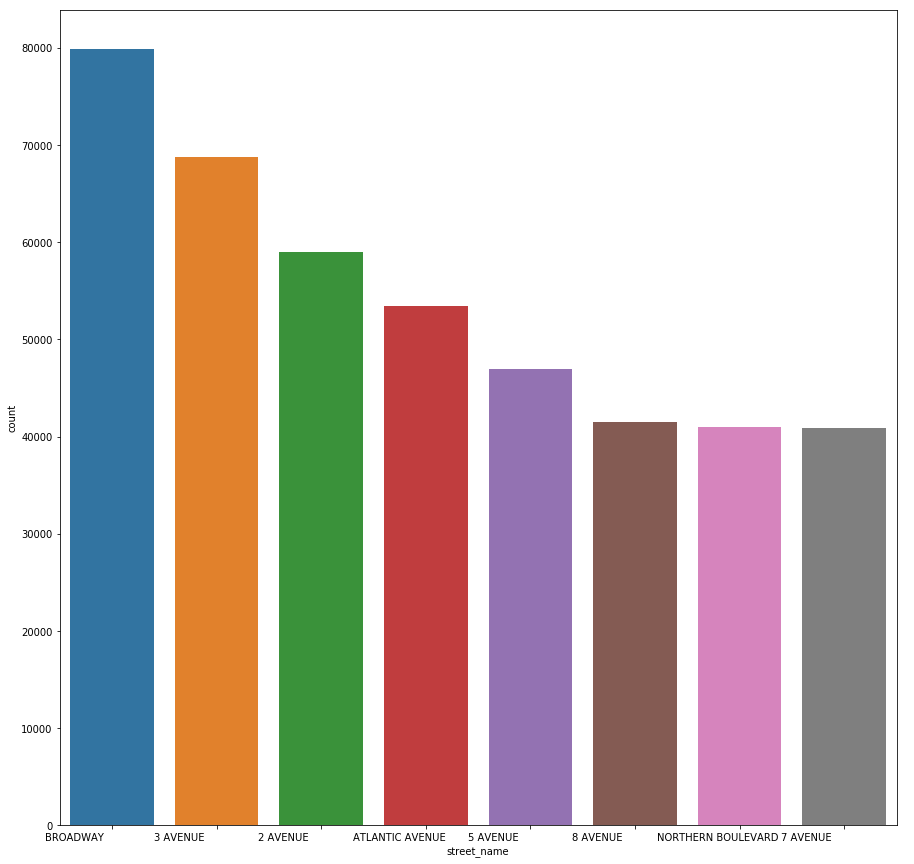

In [23]:
figure(figsize=(15,15)) #Setting the size of the plot
#countplot from seaborn to plot counts of street_name and we are specifying the top(most frequently occurring) 8 in "order" 
countplot(data=tidy_street, x = tidy_street['street_name'],         
     order = tidy_street.street_name.value_counts().iloc[0:8].index)  
show()

Let's take a look at how the number of persons injured per incident are distributed in the data.

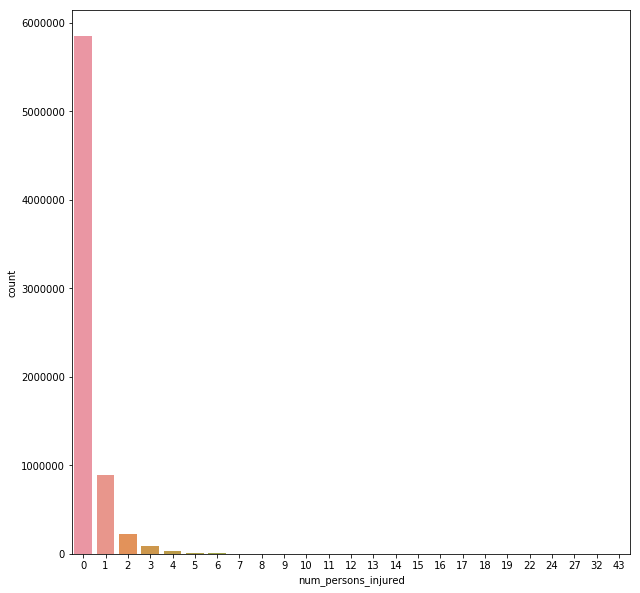

In [24]:
figure(figsize=(10,10)) #Setting the size of the plot
countplot(data=tidy_street, x = tidy_street['num_persons_injured']) #plotting counts of number of persons injured per incident
show()

From the above plot, it is clear that the count of "No person being injured is the highest". Let's take a look at cases where 1 or more people were injured in these incidents from our dataset. 

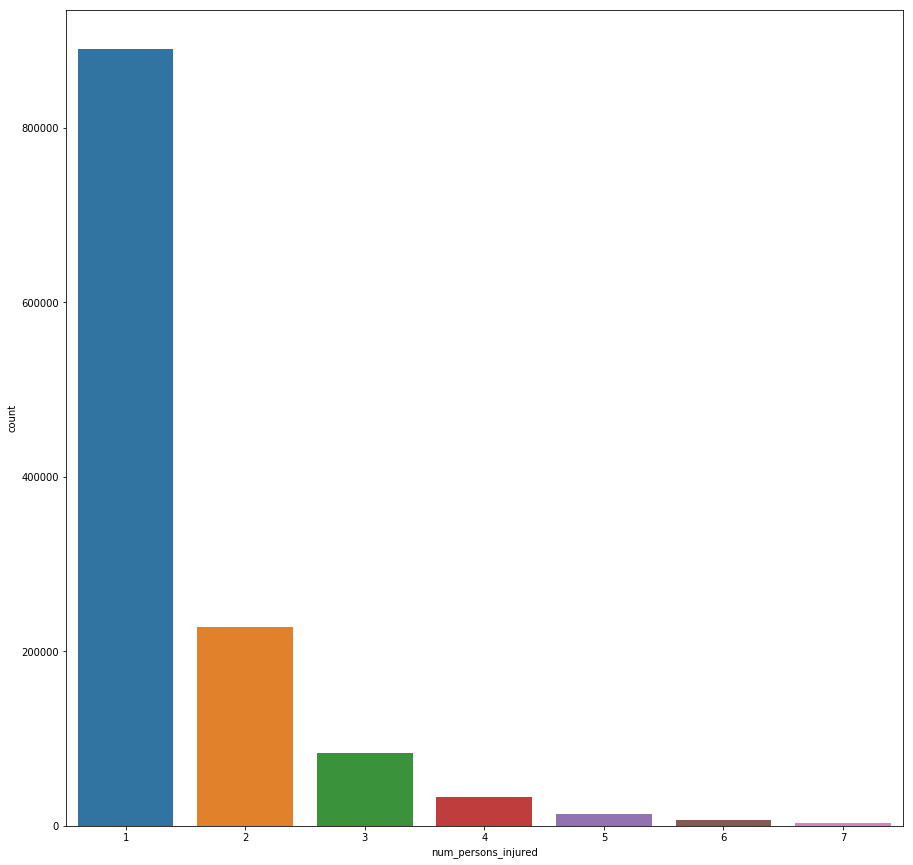

In [25]:
figure(figsize=(15,15)) #Setting the size of the plot
#countplot to plot counts of number of persons injured and we are skipping no person being injured as it is most frequent 
countplot(data=tidy_street, x = tidy_street['num_persons_injured'], 
     order = tidy_street.num_persons_injured.value_counts().iloc[1:8].index)
show()

This is just a subset of the plot before and shows us that there were more instances(after no person injured), wherein, one person was injured and the instances keep getting rarer wherein, more persons are injured in a single incident as we can see above. 

Next, let us take a look at how many cyclists  were injured per incident. 

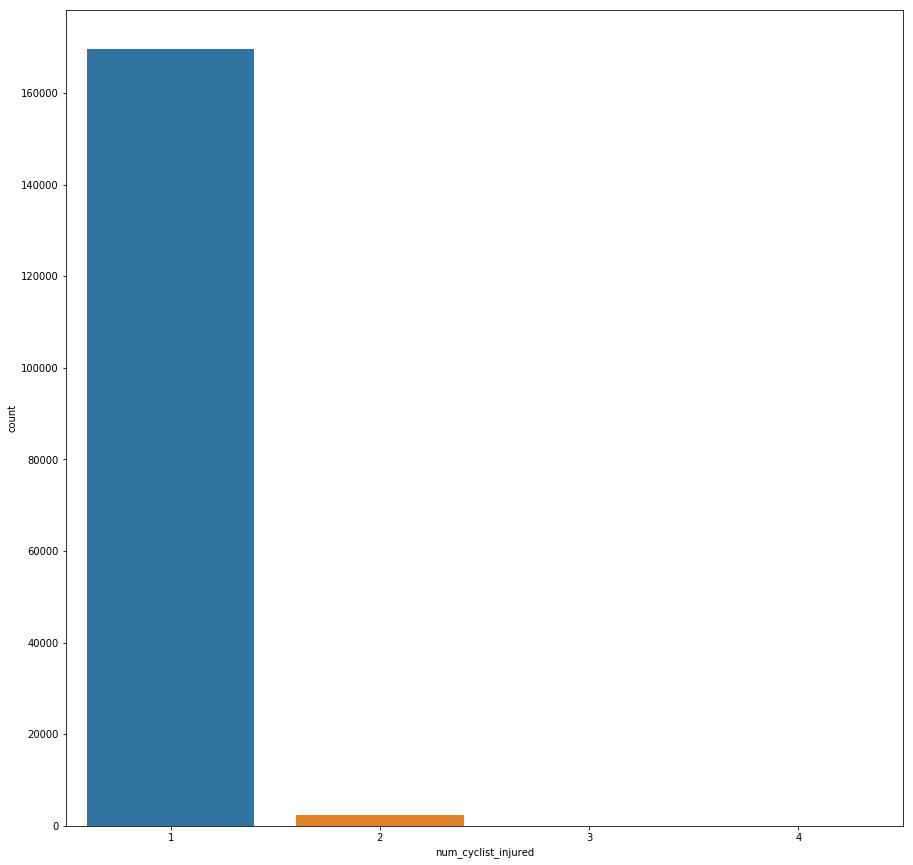

In [53]:
figure(figsize=(15,15)) #Setting the size of the plot
countplot(data=tidy_street, x =tidy_street['num_cyclist_injured'] ,
         order = tidy_street.num_cyclist_injured.value_counts().iloc[1:6].index) #Visualizing the  countplot of number of pedestrians injured
show()

Looking at how many instances of more than 1 **pedestrian** was injured.

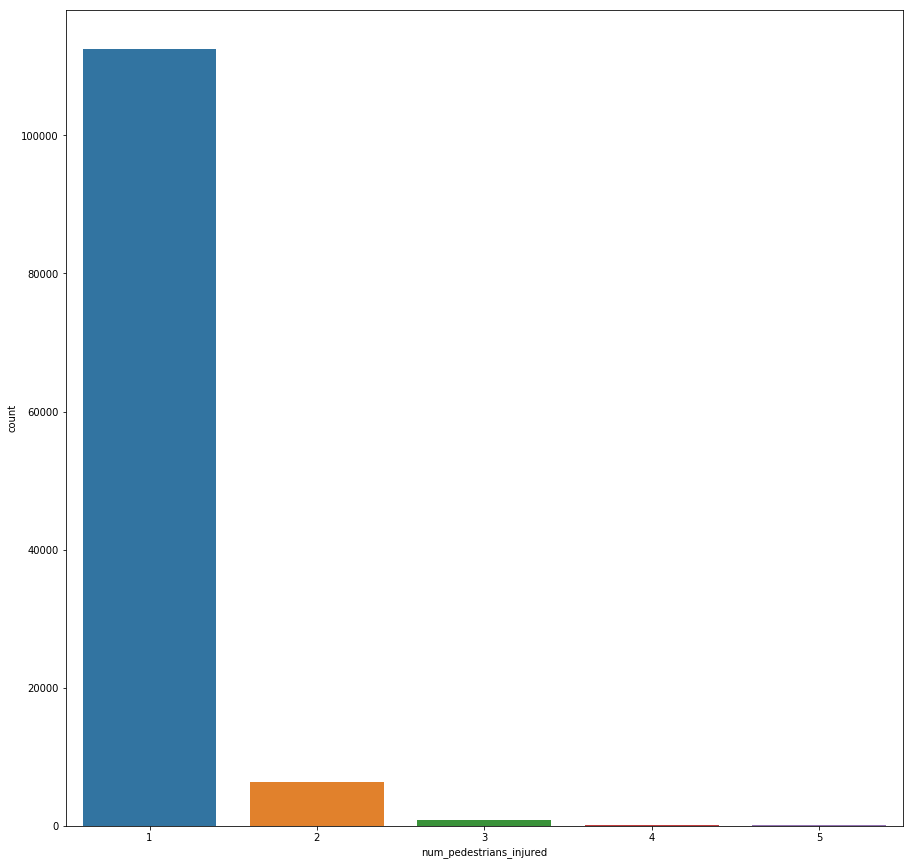

In [27]:
figure(figsize=(15,15)) #Setting the size
#Visualizing the countplot of the incidents where 1 or more people were injured
countplot(data=tidy_street, x = tidy_street['num_pedestrians_injured'],  
     order = tidy_street.num_pedestrians_injured.value_counts().iloc[1:6].index) 
show()

Let's now take a look at how many instances of 1 or more **motorists** are injured. 

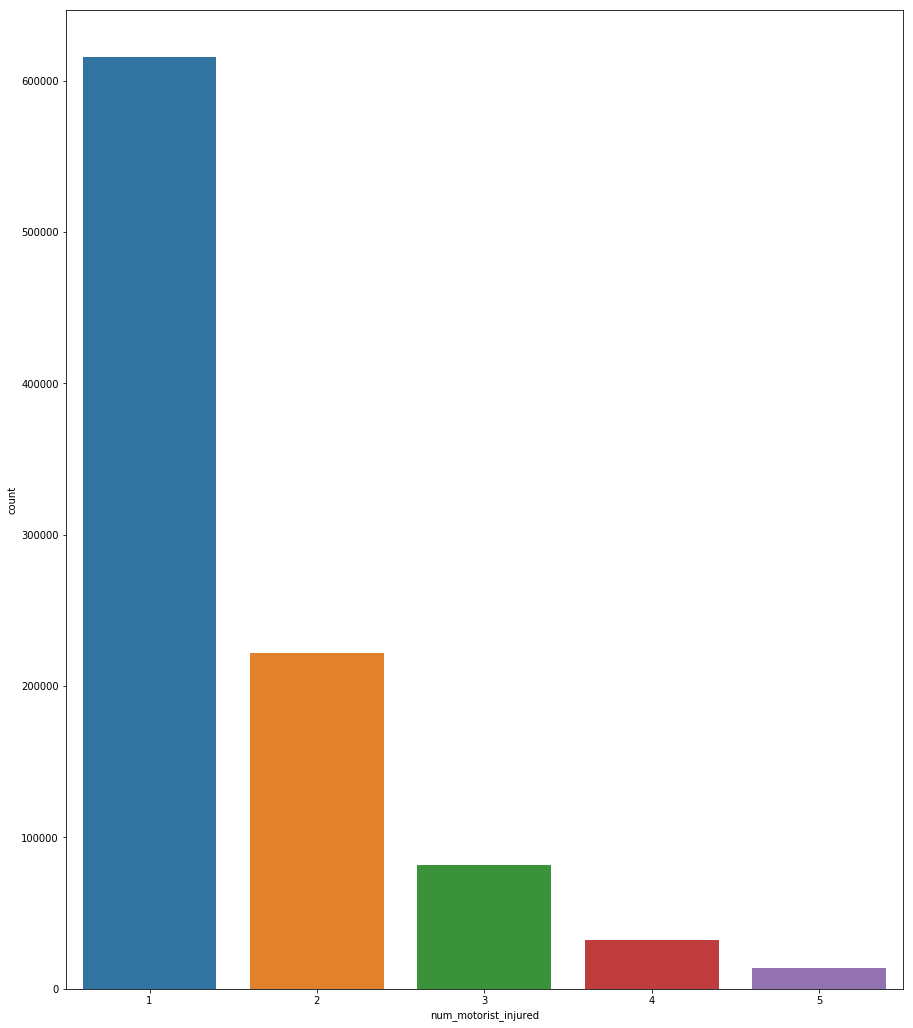

In [52]:
figure(figsize=(15,18)) #Specifying size of plot
countplot(data=tidy_street, x =tidy_street['num_motorist_injured'] ,
          order = tidy_street.num_motorist_injured.value_counts().iloc[1:6].index) #Top 5; excluding no motorists injured
show()

The maximum instances in these reports shows that one pedestrian was injured followed by lower instances of 2 or more pedestrians being injured, which makes sense

As we see from the above analysis, the maximum instances of injury seems to be when 1 person is injured in all the cases - pedestrians, cyclists and motorists. 

The following plot explains that the number of persons injured (records where number of persons injured is 1) is the sum of number of cyclists injured, number of motorists injured and number of pedestrians injured. 

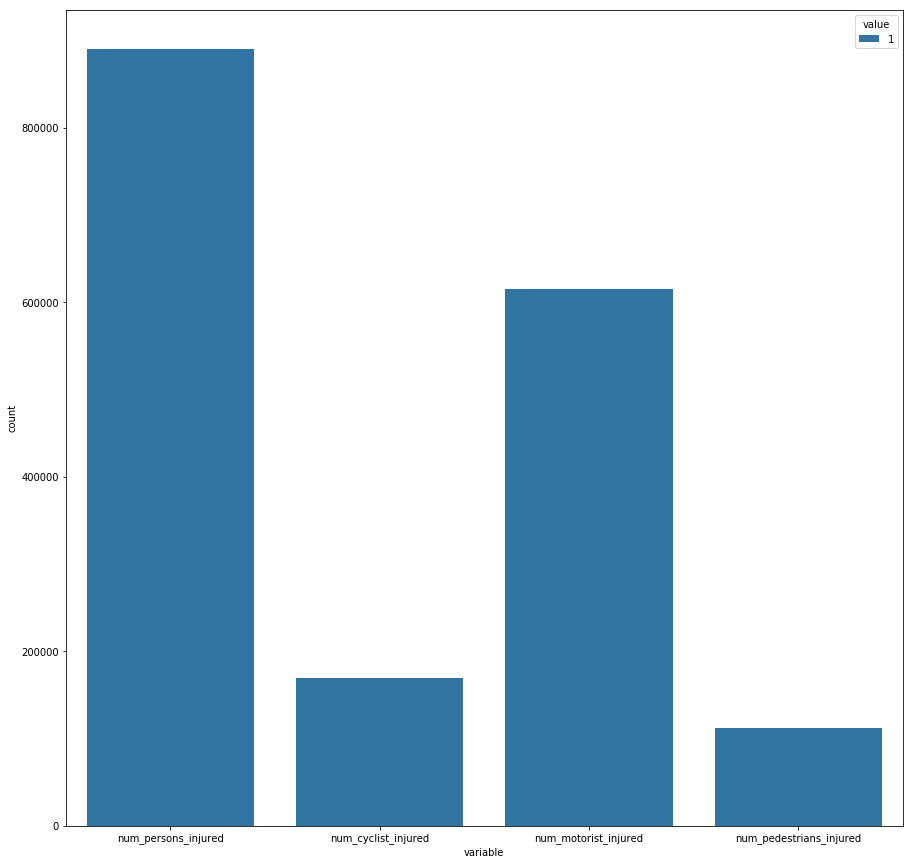

In [28]:
tidy_street_injured = pd.DataFrame(tidy_street.loc[:,
('num_persons_injured', 'num_cyclist_injured', 'num_motorist_injured', 'num_pedestrians_injured')]) #Subsetting dataframe
new_df = pd.melt(tidy_street_injured) #Melting data to get counts for each of the above categories 
figure(figsize=(15,15))
countplot(data=new_df.loc[new_df['value']==1], x='variable', hue='value') #Setting coutplots fot 1 person injured to compare
show()

Therefore, let's move our focus to fine grain analysis of the driving contributing factors when a pedestrian was injured v/s a cyclist was injured v/s a motorist was injured. Let us also try to understand among the high incident street names, which category of injured is higher. 

Before we get to this, let's take a look at the contributing factors of these incidents. The top 6 contributing factors that were stated as reasons for the cause of incident that was reported are as shown below. 

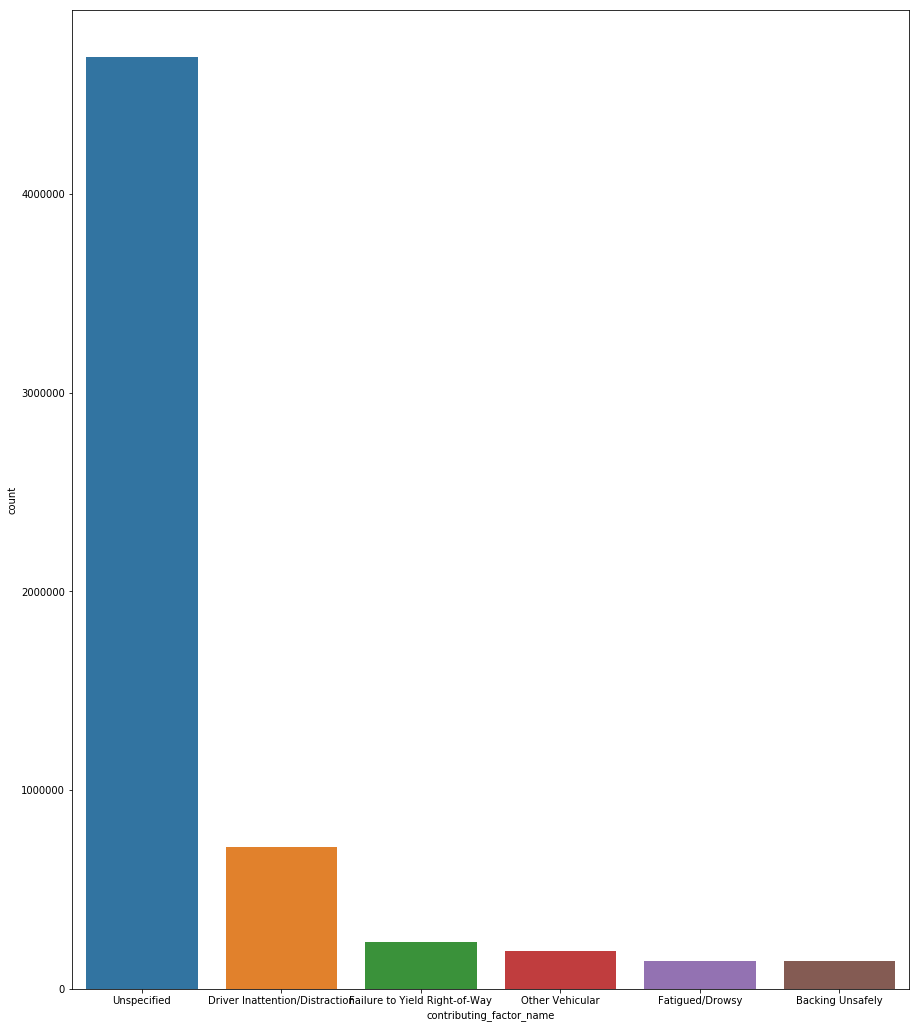

In [42]:
figure(figsize=(15,18)) #Setting figure size
countplot(data = tidy_street, x = tidy_street['contributing_factor_name'] ,
          order = tidy_street.contributing_factor_name.value_counts().iloc[0:6].index) #Top 6 contributing factors for incidents
show()

**Driver Inattention/Distraction** seems to be the top reason for cause of accident after **Unspecified**.  

It appears that most accidents get reported without a cause being specified.

Now, that we have Visualized each of these variables individually, let's take a look at how these variables may be related to one another. 

**For eg, are we seeing a higher count of the pedestrians who were reported as injured to be injured in Broadway street(our top observation of accident reports) and what was the contributing factor. **

In [74]:
l = ['street_name','contributing_factor_name','num_pedestrians_injured','num_cyclist_injured',
    'num_motorist_injured'] #Creating a list of single valriable analysis to pass into a pairwise analysis
pairwise_df = tidy_street[l] #Passing the selected variables into creating pairwise_df

pairwise_df.head() #Looking at the top 5 of pairwise_df

,street_name,contributing_factor_name,num_pedestrians_injured,num_cyclist_injured,num_motorist_injured
0,JACKIE ROBINSON PKWY,Driver Inattention/Distraction,0,0,0
1,91 AVENUE,Traffic Control Disregarded,0,0,1
2,CROSS ISLAND PARKWAY,Unspecified,0,0,0
3,HUDSON STREET,Failure to Yield Right-of-Way,0,1,0
4,BOSTON ROAD,Driver Inexperience,0,0,0


#### Pairwise Analysis

Let's begin by getting a generic pairwise plot for the number of pedestrians, cyclists and motorists injured as shown below to see if there is any correlation between variables.

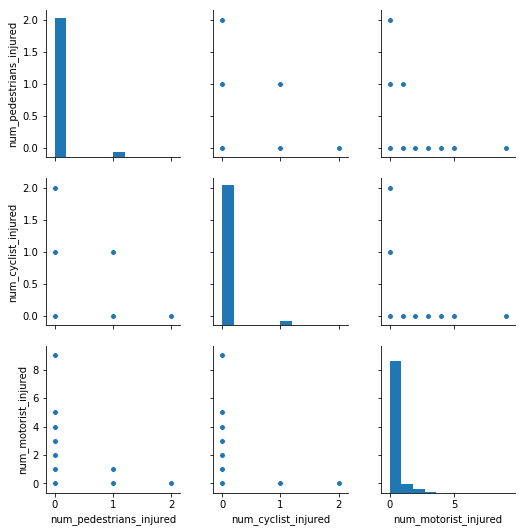

In [89]:
sns.pairplot(pairwise_df) #Pairwise plot for number of pedestrians,cyclists and motorists injured

Some points to observe:

1. There seems to be a correlation between number of pedestrians injured and number of motorists injured.
2. As we can see in the pairwise plot, the number of motorists injured seems to be in a much larger scale as compared to number of pedestrians and cyclists injured - which may have tougher to realize while comparing individual plots.
3. Cyclists seem to be in lower number of accidents as reported in this data set. 

Let's take a look at how the distribution of the following vary with respect to the top 5 contributing factors (leaving Unspecified out of this analysis).

* number of pedestrians injured
* number of cyclists injured
* number of motorists injured

In [75]:
#Getting all the records for corresponding top 5 contributing factors into consideration
pairwise_df = pairwise_df[pairwise_df['contributing_factor_name'].isin(['Driver Inattention/Distraction',
                                                       'Failure to Yield Right-of-Way',
                                                        'Other Vehicular','Fatigued/Drowsy','Backing Unsafely'])] 


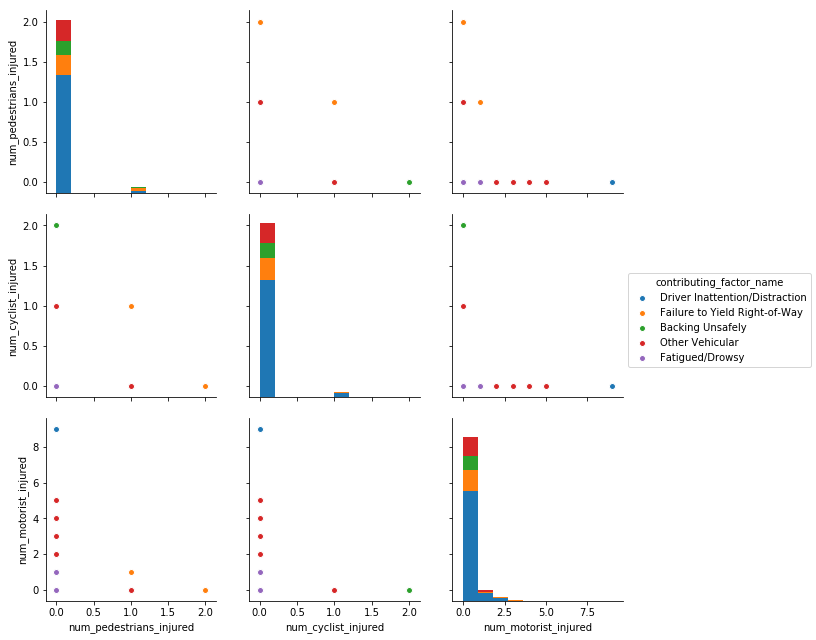

In [88]:
#Creating a pairwise plot with respect to contributing factor name 
sns.pairplot(pairwise_df, hue='contributing_factor_name',size =3) 

Some observations from the above plots are:

1. Driver Inattention seems to be the most evident contributing factor in the histograms - this information was also captured when we plotted the individual histograms.
2. 'Fatigued/Drowsy' along with 'Other Vehicular' seems to contribute to motorists being injured. 
3. 'Other Vehicular' and 'Failure to Yield Right-of-Way' seems to be contributing to more pedestrians being injured.

Let us now look at a pairwise plot of the number of injured pedestrians, cyclists and motorists with respect to street name in the data.

In [82]:
tidy_street.street_name.value_counts().iloc[0:8].index #Looking at the top 8 high frequent accident streets

Index(['BROADWAY                        ', '3 AVENUE                        ',
       '2 AVENUE                        ', 'ATLANTIC AVENUE                 ',
       '5 AVENUE                        ', '8 AVENUE                        ',
       'NORTHERN BOULEVARD              ', '7 AVENUE                        '],
      dtype='object')

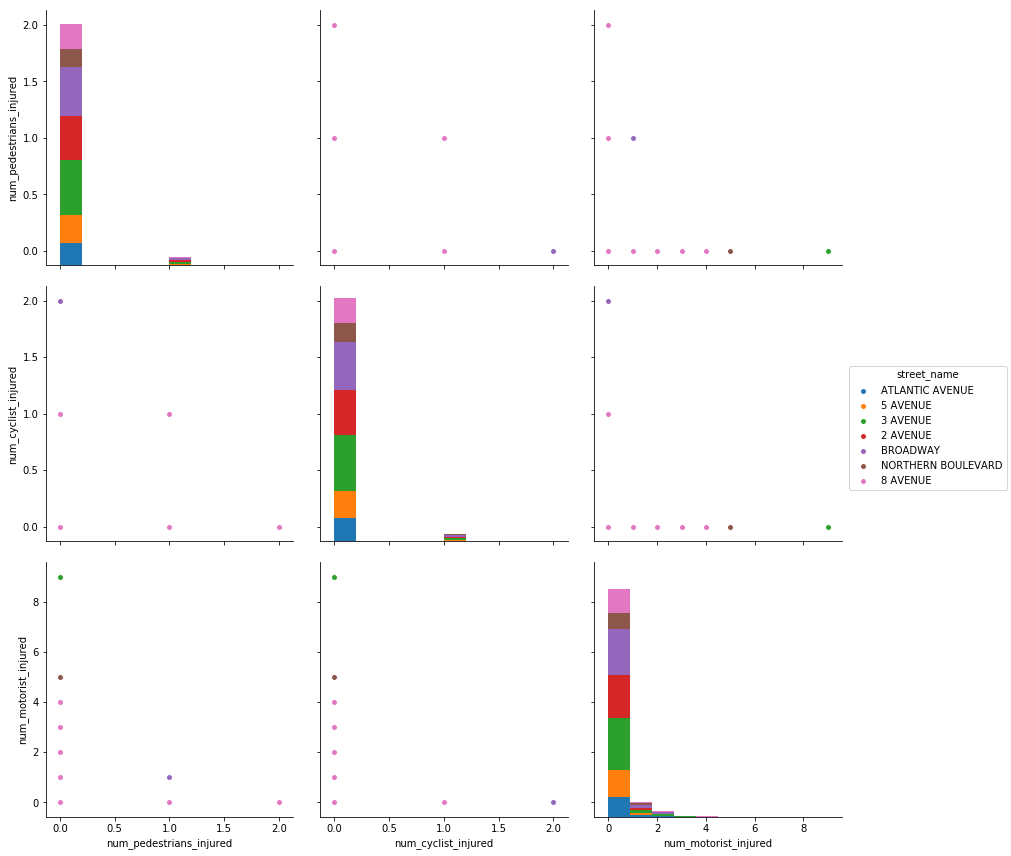

In [85]:
#Filtering the corresponding high frequent street records
pairwise_df = pairwise_df[pairwise_df['street_name'].isin(['BROADWAY',
                                                      '3 AVENUE',
                                                      '2 AVENUE','ATLANTIC AVENUE',
                                                      '5 AVENUE','8 AVENUE','NORTHERN BOULEVARD'])] 

sns.pairplot(pairwise_df,hue='street_name',size = 4)

Some Observations from the above plots: 
1. Broadway is still the larger chunk of the histograms for motorists, pedestrians and cyclists as seen before in the individual plot analysis. 
2. 8th Avenue seems to be a street where more motorists have been injured while no pedestrians have been injured in those instances. 
3. There appears to be downward trend in the two variables, where in, if more motorists were hurt, fewer pedestrians were hurt and vice-versa. 

#### KEY TAKE-AWAYS FROM VISUALIZATIONS:

1. Most of the incidents do not seem to have persons injured and the number of casualties of 1 or more decreases.
2. Broadway street seems to have the most incidents reported .
3. Counts of injured pedestrians, cyclists, motorists(Considering 1 injured persoon per incident):
    * Pedestrians: ~110,000
    * Cyclists: ~170,000
    * Motorists: ~650,000
4. Clearly, there are higher instances of motorists being injured. Indicating, probabilistically, that NYC may be safer for cyclists and pedestrians as compared to motorists (going purely by injuries reported).
5. The top contributing factor in these incident reports, is "Unspecified", followed by "Driver Inattention/Distraction". 
6. "Backing Unsafely", "Failure to yield", "Other vehicular" seem to cause higher number of casualties, although occur rarely as compared to "Distraction" and "Fatigued/Drowsy" 
7. More motorists per incident seem to have been injured in 8th Avanue, while the street seems to record lower pedestrian injuries. 
8. There are other factors such as vehicle type, persons killed that were not considered and may add another dimension to safety of persons in this analysis. 

<h1 style='color:blue'><center>Machine Learning Models</center></h1>

Let's take up questions about the data set andanswer these questions using Statistics and Machine Learning techniques.

We must first determine if there are variables in this data set which are related to one another. 

References: 

* https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
* https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots